<a href="https://colab.research.google.com/github/jvcamacho1/QConcursos-SigmaGeek/blob/main/QConcursos_SigmaGeek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


##1- Understading the Data
Looking for unique values in the data, for future classification and normalization

In [59]:
#df_model = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/Dataset_model.csv')
df_model = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/Dataset_model_processado.csv')
#subjects = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/subjects_questions.csv')

In [60]:
#df_model['subject_id'] = subjects['subject_id']

In [61]:
df_model.describe()

,Unnamed: 0,novo_user_id,acertou,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,outdated,scholarity_id,novo_question_id,score_user,score_questao
count,1.994846e+06,1.994846e+06,1.994846e+06,1.994668e+06,1.992218e+06,1.994668e+06,1.994664e+06,1.994664e+06,1.994668e+06,1.994668e+06,1.994668e+06,1.994668e+06,1.994846e+06,1.994746e+06,1.994846e+06
mean,1.000387e+06,1.000438e+04,6.546420e-01,5.547384e-01,1.998077e+00,7.164762e+01,1.818385e+02,4.532343e+03,1.587963e+01,1.247089e+00,1.785761e-02,2.636609e+00,2.671055e+05,6.529998e+01,4.720920e+01
std,5.773282e+05,5.773282e+03,4.754850e-01,4.969948e-01,8.537872e-01,1.370736e+02,3.342811e+02,2.904568e+03,3.041407e+01,4.313189e-01,1.324338e-01,5.235831e-01,1.354971e+05,1.264567e+01,3.106612e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00
25%,5.004392e+05,5.005000e+03,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.350000e+02,9.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.642860e+05,5.700000e+01,1.700000e+01
50%,1.000610e+06,1.000700e+04,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00,6.300000e+01,5.782000e+03,9.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.708670e+05,6.600000e+01,5.200000e+01
75%,1.500390e+06,1.500400e+04,1.000000e+00,1.000000e+00,3.000000e+00,5.300000e+01,2.070000e+02,6.260000e+03,1.400000e+01,1.000000e+00,0.000000e+00,3.000000e+00,3.716970e+05,7.400000e+01,7.300000e+01
max,1.999999e+06,2.000000e+04,1.000000e+00,1.000000e+00,5.000000e+00,5.930000e+02,3.851000e+03,1.027800e+04,3.250000e+02,2.000000e+00,1.000000e+00,3.000000e+00,5.006940e+05,9.900000e+01,9.900000e+01


In [62]:
df_model.nunique()

Unnamed: 0                1994846
novo_user_id                20000
platform                        3
region                         50
gp:carrers                   1451
gp:previous experience          4
gp:segment                      4
gp:source_project               2
acertou                         2
commented_by_professor          2
difficulty                      5
discipline_id                 225
examining_board_id            580
institute_id                 3099
knowledge_area_id              94
modality_id                     2
outdated                        2
right_answer                    5
scholarity_id                   3
novo_question_id           496354
score_user                     85
score_questao                  97
dtype: int64

In [63]:
df_model.dtypes

Unnamed: 0                  int64
novo_user_id                int64
platform                   object
region                     object
gp:carrers                 object
gp:previous experience     object
gp:segment                 object
gp:source_project          object
acertou                     int64
commented_by_professor    float64
difficulty                float64
discipline_id             float64
examining_board_id        float64
institute_id              float64
knowledge_area_id         float64
modality_id               float64
outdated                  float64
right_answer               object
scholarity_id             float64
novo_question_id            int64
score_user                float64
score_questao             float64
dtype: object

In [64]:
unique_values= dict()
for col in df_model:
    unique_values[col] = df_model[col].unique()

In [65]:
for i in df_model:
	# count number of rows with missing values
	n_miss = df_model[i].isna().sum()
	perc = n_miss / df_model.shape[0] * 100
	print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Unnamed: 0, Missing: 0 (0.0%)
> novo_user_id, Missing: 0 (0.0%)
> platform, Missing: 13155 (0.7%)
> region, Missing: 13654 (0.7%)
> gp:carrers, Missing: 116543 (5.8%)
> gp:previous experience, Missing: 0 (0.0%)
> gp:segment, Missing: 35098 (1.8%)
> gp:source_project, Missing: 37891 (1.9%)
> acertou, Missing: 0 (0.0%)
> commented_by_professor, Missing: 178 (0.0%)
> difficulty, Missing: 2628 (0.1%)
> discipline_id, Missing: 178 (0.0%)
> examining_board_id, Missing: 182 (0.0%)
> institute_id, Missing: 182 (0.0%)
> knowledge_area_id, Missing: 178 (0.0%)
> modality_id, Missing: 178 (0.0%)
> outdated, Missing: 178 (0.0%)
> right_answer, Missing: 178 (0.0%)
> scholarity_id, Missing: 178 (0.0%)
> novo_question_id, Missing: 0 (0.0%)
> score_user, Missing: 100 (0.0%)
> score_questao, Missing: 0 (0.0%)


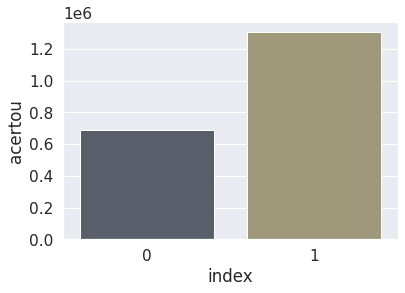

In [66]:
balance = df_model['acertou'].value_counts().reset_index()
sns.barplot(x='index', y='acertou', data=balance, palette='cividis')

##2-Cleanning The Data
Removing unnecessary columns and filling Nan Values

In [67]:
#df_model.drop(df_model[df_model['nullified'] == 1.0].index, inplace=True)
df_model.drop(df_model[df_model['score_questao'] == 1].index, inplace=True)
df_model.drop(df_model[df_model['score_questao'] == 0].index, inplace=True)
df_model = df_model.drop('Unnamed: 0', axis=1)

In [56]:
df_model = df_model.drop('novo_question_id', axis=1)
#df_model = df_model.drop('score_questao', axis=1)
#df_model = df_model.drop('gp:carrers', axis=1)
#df_model = df_model.drop('platform', axis=1)
#df_model = df_model.drop('region', axis=1)
#df_model = df_model.drop('gp:source_project', axis=1)
#df_model = df_model.drop('gp:segment', axis=1)
#df_model = df_model.drop('gp:previous experience', axis=1)
#df_model = df_model.drop('right_answer', axis=1)

#df_model = df_model.drop('discipline_id', axis=1)
#df_model = df_model.drop('examining_board_id', axis=1)
#df_model = df_model.drop('institute_id', axis=1)
#df_model = df_model.drop('knowledge_area_id', axis=1)

df_model = df_model.drop('city', axis=1)
df_model = df_model.drop('country', axis=1)
df_model = df_model.drop('device', axis=1)
df_model = df_model.drop('device_type', axis=1)
df_model = df_model.drop('os', axis=1)
df_model = df_model.drop('created_at', axis=1)
df_model = df_model.drop('nullified', axis=1)
df_model = df_model.drop('product_id', axis=1)
df_model = df_model.drop('publication_year', axis=1)
df_model = df_model.drop('row', axis=1)
df_model = df_model.drop('gp:degree course', axis=1)
df_model = df_model.drop('gp:school type', axis=1)
df_model = df_model.drop('gp:college type', axis=1)

KeyError: ignored

In [ ]:
df_model['gp:previous experience'].value_counts(normalize=True) * 100

In [ ]:
import numpy as np

m = df_model['gp:previous experience'].isna()

l = m.sum()

s = np.random.choice(['beginner','experient','professional','highly_experient'], size=l,p=[0.57632658,0.28580506,0.09830975,0.03955861])

df_model.loc[m, 'gp:previous experience'] = s

In [ ]:
df_model['gp:previous experience'].value_counts(normalize=True) * 100

In [ ]:
for i in df_model:
	# count number of rows with missing values
	n_miss = df_model[i].isna().sum()
	perc = n_miss / df_model.shape[0] * 100
	print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

##3- Feature engineering

Não esta sendo usado

Não está sendo usado


In [ ]:
#df_model = df_model[(df_model['novo_user_id']<=1000)]

In [ ]:
#df_model['score_user'] =np.nan
#df_model['score_questao'] =np.nan

In [ ]:
#df_score_user = df_model.groupby('novo_user_id')
#df_score_questao = df_model.groupby('novo_question_id')

In [ ]:
# for key in df_score_questao.groups.keys():
#   score = df_score_questao.get_group(key).groupby('acertou')
#   if(len(score.size())== 1):
#     df_model.loc[df_model['novo_question_id'] == key , 'score_questao'] = float(list(score.groups.keys())[0])
#   else:
#     df_model.loc[df_model['novo_question_id'] == key , 'score_questao'] = float(round(score.size()[1]/(score.size()[1]+score.size()[0])*100))

In [ ]:
# for rowIndex in range(1,len(df_model['novo_user_id'].unique())):
#   score = df_score_user.get_group(rowIndex).groupby('acertou')
#   df_model.loc[df_model['novo_user_id'] == rowIndex , 'score_user'] = score.size()[1]

In [ ]:
# df_model

In [ ]:
# df_model.to_csv('/content/drive/MyDrive/Sigma/QConcursos/Dataset_model_processado.csv')

##4- Normalizing the data
Labeling string values

In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode =list(df_model.select_dtypes(include=['category','object']))
for feature in columns_to_encode:
  df_model[feature] = le.fit_transform(df_model[feature].astype(str))


##5- Pré Processamento
Modelando dados para entrarem no modelo

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
import sklearn
from imblearn.over_sampling import RandomOverSampler

scaler = StandardScaler()

df_model_val = df_model[(df_model['novo_user_id']>18000) & (df_model['novo_user_id']<=20000)]
df_model = df_model[(df_model['novo_user_id']<=2000)]

ros = RandomOverSampler(random_state=888)

df_acertou = df_model['acertou']
df_acertou_val = df_model_val['acertou']

print('Y \n',df_acertou.value_counts())

df_model=df_model.drop('acertou',axis=1)
df_model_val=df_model_val.drop('acertou',axis=1)

df_model = df_model.fillna(0)
df_model_val = df_model_val.fillna(0)


df_model, df_acertou = ros.fit_resample(df_model, df_acertou)

X_val = scaler.fit_transform(df_model_val)
y_val = df_acertou_val

print('Y \n',df_acertou.value_counts())


X_train, X_test, y_train, y_test = train_test_split(df_model,df_acertou, test_size=0.2, random_state=888)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Y 
 1    97004
0    48623
Name: acertou, dtype: int64
Y 
 0    97004
1    97004
Name: acertou, dtype: int64


In [70]:
uniques, counts = np.unique(y_train, return_counts=True)
dict(zip(uniques, counts * 100 / len(y_train)))

{0: 50.040591214257184, 1: 49.959408785742816}

In [71]:
uniques, counts = np.unique(y_test, return_counts=True)
dict(zip(uniques, counts * 100 / len(y_test)))

{0: 49.83763723519406, 1: 50.16236276480594}

In [72]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (155206, 20)
y_train: (155206,)
X_test: (38802, 20)
y_test: (38802,)


##-6 Modelos prontos

##RandomForest

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

rfc=RandomForestClassifier(max_depth=64,n_estimators=1000,random_state=42, class_weight='balanced')
rfc.fit(X_train,y_train)

In [ ]:
y_pred=rfc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Errou', 'Acertou']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
plt.barh(df_model.columns, rfc.feature_importances_)

In [ ]:
y_pred = rfc.predict(X_val)
matrix = confusion_matrix(y_val, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Errou', 'Acertou']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(f1_score(y_val, y_pred))
plt.barh(df_model_val.columns, rfc.feature_importances_)

In [ ]:
pd.Series(y_pred).value_counts()

##GridSearch

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [ ]:

param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [ ]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [ ]:
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

In [ ]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__class_weight': None,
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [ ]:
gs.best_score_

0.798290500005897

In [ ]:
gs.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=250,
                                        random_state=42))])

In [ ]:
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))
print("Test F1 Score:",f1_score(gs.predict(X_test), y_test))

Test Precision: 0.7395079594790159
Test Recall: 0.8136942675159236
Test ROC AUC Score: 0.7875364841777585
Test F1 Score: 0.7748294162244124


##Decision

In [79]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

xgb = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
max_depth=None, max_features=None,
min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, 
random_state=None, splitter='best')
xgb.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [80]:
y_pred=xgb.predict(X_test)

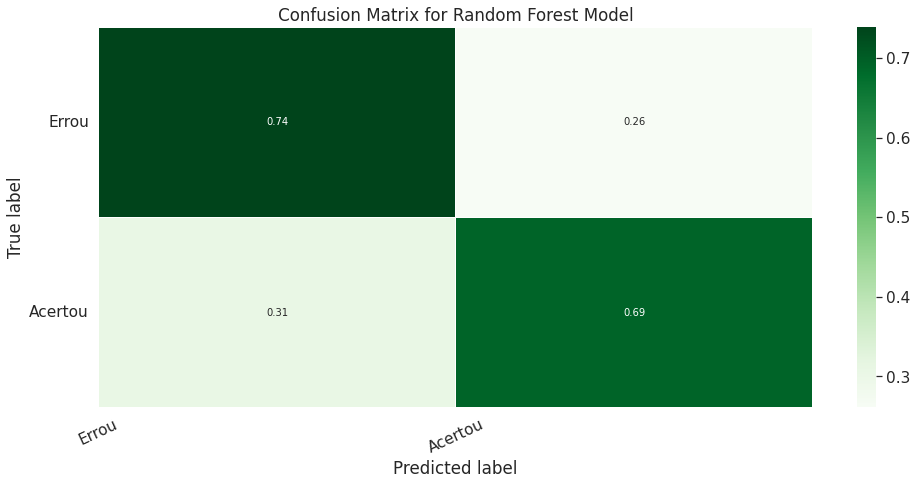

In [81]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Errou', 'Acertou']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Accuracy: 0.7150146899644348
              precision    recall  f1-score   support

           0       0.70      0.74      0.72     19338
           1       0.73      0.69      0.71     19464

    accuracy                           0.72     38802
   macro avg       0.72      0.72      0.71     38802
weighted avg       0.72      0.72      0.71     38802

0.7086626620297186


<BarContainer object of 20 artists>

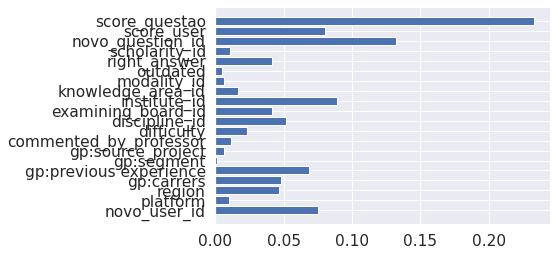

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
plt.barh(df_model.columns, xgb.feature_importances_)

##7-Definindo modelo
Rede Neural

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='accuracy', factor=0.2,patience=5, min_lr=0.001)

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=X_test.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1, callbacks=[reduce_lr])

In [ ]:
y_pred = model.predict(X_test)
y_pred = [int(round(x[0])) for x in y_pred]
sklearn.metrics.accuracy_score(y_test, y_pred)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns
from sklearn import metrics

matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Errou', 'Acertou']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Neural Network')
plt.show()

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

##8- Evaluating answers

In [108]:
df_respostas_101 = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/Submit.csv',sep=';')
#subjects = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/subjects_questions.csv')

In [109]:
df_respostas_101 = df_respostas_101.drop('city', axis=1)
df_respostas_101 = df_respostas_101.drop('country', axis=1)
df_respostas_101 = df_respostas_101.drop('device', axis=1)
df_respostas_101 = df_respostas_101.drop('device_type', axis=1)
df_respostas_101 = df_respostas_101.drop('os', axis=1)
df_respostas_101 = df_respostas_101.drop('created_at', axis=1)
df_respostas_101 = df_respostas_101.drop('nullified', axis=1)
df_respostas_101 = df_respostas_101.drop('product_id', axis=1)
df_respostas_101 = df_respostas_101.drop('publication_year', axis=1)
df_respostas_101 = df_respostas_101.drop('row', axis=1)
df_respostas_101 = df_respostas_101.drop('gp:degree course', axis=1)
df_respostas_101 = df_respostas_101.drop('gp:school type', axis=1)
df_respostas_101 = df_respostas_101.drop('gp:college type', axis=1)


In [110]:
df_respostas_101['score_user'] =np.nan
df_respostas_101['score_questao'] =np.nan

In [111]:
for rowIndex in range(1,len(df_respostas_101['score_questao'].unique())):
  df_respostas_101.loc[df_respostas_101['score_questao'] == rowIndex , 'score_questao'] = df_model.loc[df_model['score_questao'] == rowIndex]

In [112]:
for rowIndex in range(1,len(df_respostas_101['novo_user_id'].unique())):
  df_respostas_101.loc[df_respostas_101['novo_user_id'] == rowIndex , 'score_user'] = df_model.loc[df_model['novo_user_id'] == rowIndex]

In [113]:
import numpy as np

m = df_respostas_101['gp:previous experience'].isna()

l = m.sum()

s = np.random.choice(['beginner','experient','professional','highly_experient'], size=l,p=[0.57628192,0.28581979,0.09833298,0.03956531])

df_respostas_101.loc[m, 'gp:previous experience'] = s

In [114]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_to_encode =list(df_respostas_101.select_dtypes(include=['category','object']))
for feature in columns_to_encode:
  df_respostas_101[feature] = le.fit_transform(df_respostas_101[feature].astype(str))


In [115]:
df_respostas_101 = df_respostas_101.drop('acertou',axis=1)
df_respostas_101 = df_respostas_101.fillna(0)

In [116]:
x = df_respostas_101.to_numpy()

In [117]:
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.73196421e+00,  2.31294738e+00,  8.54337538e-01, ...,
         1.52122505e+00,  1.41417821e+02,  0.00000000e+00],
       [-1.73179100e+00,  1.59766055e-01,  1.13225223e+00, ...,
        -8.45027545e-01, -7.07124460e-03,  0.00000000e+00],
       [-1.73161780e+00,  2.31294738e+00,  2.05934783e-02, ...,
        -3.09526482e-01, -7.07124460e-03,  0.00000000e+00],
       ...,
       [ 1.73161780e+00,  1.59766055e-01, -1.57741597e+00, ...,
         1.20874999e+00, -7.07124460e-03,  0.00000000e+00],
       [ 1.73179100e+00, -1.99341527e+00, -1.78585199e+00, ...,
         1.21892160e+00, -7.07124460e-03,  0.00000000e+00],
       [ 1.73196421e+00,  2.31294738e+00,  1.13225223e+00, ...,
         1.09414840e+00, -7.07124460e-03,  0.00000000e+00]])

In [118]:
y_pred=rfc.predict(x)

In [119]:
pd.Series(y_pred).value_counts()

1    19924
0       76
dtype: int64

In [120]:
pd.DataFrame(y_pred).to_csv('/content/drive/MyDrive/Sigma/QConcursos/respostas101.csv',index=False)

In [121]:
#import joblib

#joblib.dump(rfc, "/content/drive/MyDrive/Sigma/QConcursos/random_forest.joblib")

In [122]:
#test = pd.read_csv('/content/drive/MyDrive/Sigma/QConcursos/respostas101.csv',sep=',')
#test.value_counts()